# Linear Programming and optimization using python

+ **Optimization:** A family of quantitative techniques for obtaining optimal solutions to complex problems with resource constraints.
+ **Linear programming (LP):** A simple way to perform optimization by assuming linear relationships among relevant variables.

## Basic terminologies of Linear Programming
+ Here are the key terminologies come across when learning linear programming:
    + Decision variables
    + Objective function
    + Constraints
    + Non-negativity restriction

+ **Objective function:** A mathematical representation of an objective, usually expressed as a maximization or minimization function of a single variable such as
profit or cost.

+ **Decision variables:** Choices or alternatives available for a decision maker to choose, in order to maximize or minimize the value of the objective function.

+ **Constraints:** Limitations within which a decision maker needs to operate that usually represent the limited resources available to the decision makers.

+ **Parameters:** Numerical values in the LP mathematical expression associated with the objective function, the decision variables, and the constraints.


## Required Package 
+ PuLP is a free open source software written in Python. 
+ It is used to describe optimisation problems as mathematical models. 
+ PuLP can then call any of numerous external LP solvers (CBC, GLPK, CPLEX, Gurobi etc) to solve this model and then use python commands to manipulate and display the solution.
<a href="https://www.coin-or.org/PuLP/main/installing_pulp_at_home.html" title=”Installing PuLP”>click me</a>

# Maximization LPP 
## Refer the Case Study North Face® for Details
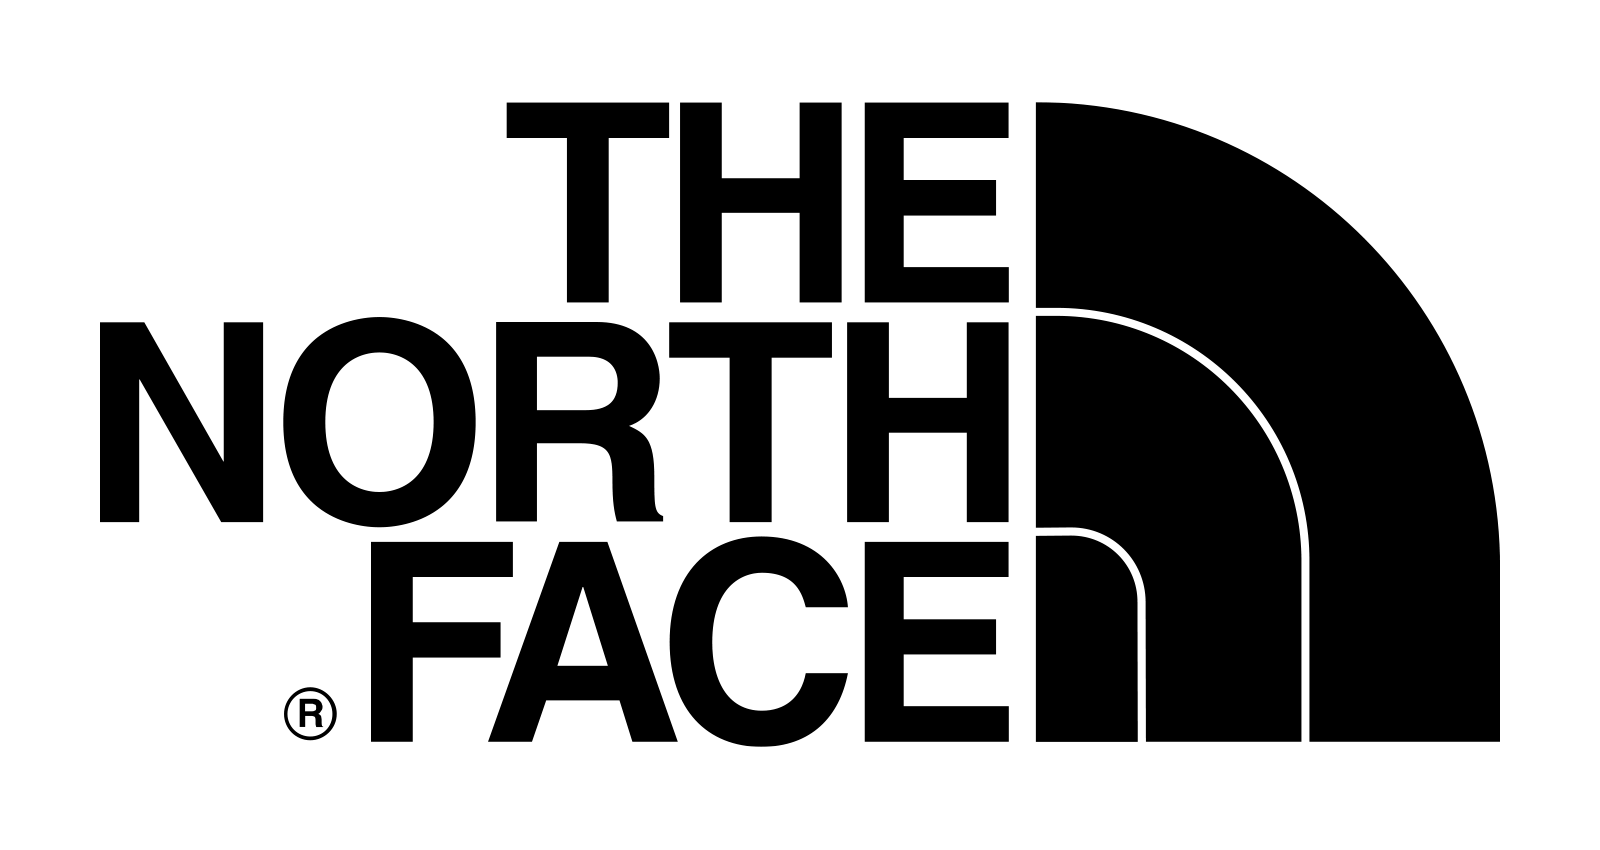

+ **a.** Load the PuLP package and define the two decision variables using the LpVariable function, using the lowBound argument to ensure these variables are non-negative (an upBound argument is also available if the converse is needed for a different problem)

In [1]:
from pulp import *

x1 = LpVariable('x1', lowBound = 0)
x2 = LpVariable('x2', lowBound = 0)

**b.** Establish the problem in PuLP using the **LpProblem** function, providing a descriptive name as the first argument and a *sense* (i.e., either **LpMinimize** or **LpMaximize** to minimize or maximize, respectively). We store the problem in a variable we label prob:

In [2]:
prob = LpProblem('Maximization', sense = LpMaximize)

**c.** Specify the objective function using the coefficients for the per-unit profits of winter jackets (\\$9) and parkas (\\$12.5) and add it to the problem (i.e., prob). Enter:

In [3]:
prob += 9*x1 + 12.5*x2

**d.** Add our five constraints to the problem as detailed given in the case study and optionally label them (to use default labels, simply omit the comma and label, e.g., `prob += x1 <= 400` vs. `prob += x1 <= 400, 'Demand_for_Jackets'`). Enter:

In [4]:
prob += 8.5*x1 + 12.5*x2 <= 4000, 'Fabric'
prob += 1.5*x1 +    2*x2 <= 650, 'Machine_Time'
prob +=   2*x1 +    3*x2 <= 900, 'Labor'
prob += x1 <= 400, 'Demand_for_Jackets'
prob += x2 <= 150, 'Demand_for_Parkas'

**e.** Call up prob and ensure that everything is copacetic:

In [5]:
prob

Maximization:
MAXIMIZE
9*x1 + 12.5*x2 + 0.0
SUBJECT TO
Fabric: 8.5 x1 + 12.5 x2 <= 4000

Machine_Time: 1.5 x1 + 2 x2 <= 650

Labor: 2 x1 + 3 x2 <= 900

Demand_for_Jackets: x1 <= 400

Demand_for_Parkas: x2 <= 150

VARIABLES
x1 Continuous
x2 Continuous

**f.** Solve the problem and store it in a variable named status. 

In [6]:
status = prob.solve()

**g.** Check to ensure the solution is optimal using the **LpStatus** dictionary:

In [7]:
LpStatus[status]

'Optimal'

**h.** To display the maximum profit, use the **value** function to check the *objective* attribute of the problem (i.e., `prob.objective`):

In [8]:
value(prob.objective)

3950.0

**i.** The **value** function can also be used to display the coefficients of the objective function:

In [10]:
value(x1)

300.0

In [11]:
value(x2)

100.0

As shown, the LP solution is for FashionTech to produce 300 winter jackets and 100 parkas.

Alternatively, we can use a basic **for** loop to extract all the coefficient values from our problem at once. Enter:

In [12]:
for variable in prob.variables():
    print(variable.name, '=', variable.varValue)

x1 = 300.0
x2 = 100.0


This code iterates across each variable in the problem using the **variables** method and then prints them out sequentially. The *name* and *varValue* attributes can be used to extract the name and value of each variable in the problem, respectively.

**j.** To display the shadow price and slack for the solution, we use another **for** loop to iterate across each of the constraints, which we can access using the **prob.constraints.items()** method. Enter:

In [13]:
import pandas as pd

l = list()

for name, c in prob.constraints.items():
    l.append([name, str(prob.constraints[name]), c.pi, c.slack])
    
pd.DataFrame(l, columns = ['name', 'constraint', 'shadow_price', 'slack'])

,name,constraint,shadow_price,slack
0,Fabric,8.5*x1 + 12.5*x2 <= 4000.0,-0.0,200.0
1,Machine_Time,1.5*x1 + 2*x2 <= 650.0,4.0,-0.0
2,Labor,2*x1 + 3*x2 <= 900,1.5,-0.0
3,Demand_for_Jackets,x1 <= 400,-0.0,100.0
4,Demand_for_Parkas,x2 <= 150,-0.0,50.0


Within this code, we use an empty list with the label l to story the various properties of each constraint, including the name, formula (i.e., `str(prob.constraints[name])`), shadow price (i.e., `c.pi`), and slack (i.e., `c.slack`). After iterating through the loop, we store the result in a Pandas DataFrame to make the result more readable.

As shown in the table, for the two binding constraints, machine time and labor, the shadow prices are \\$4 and \\$1.5, respectively. This result matches what is shown in the text.

**k.** To see the ranges of optimality and feasability, we use an alternative solver to conduct our sensitivity analysis: specifically, GLPK as noted earlier. Be aware that GLPK is not included with PuLP and must be installed separately before it can be called via PuLP. Once GLTK is installed, enter:

In [16]:
prob.solve(GLPK(options = ['--ranges sensitivity.sen']))

file = open('sensitivity.sen')
print(file.read())
file.close()

GLPK 5.0  - SENSITIVITY ANALYSIS REPORT                                                                         Page   1

Problem:    
Objective:  OBJ = 3950 (MAXimum)

   No. Row name     St      Activity         Slack   Lower bound       Activity      Obj coef  Obj value at Limiting
                                          Marginal   Upper bound          range         range   break point variable
------ ------------ -- ------------- ------------- -------------  ------------- ------------- ------------- ------------
     1 Demand_for_Jackets
                    BS     300.00000     100.00000          -Inf      225.00000       -.66667    3750.00000 Machine_Time
                                            .          400.00000      433.33333        .37500    4062.50000 Labor

     2 Demand_for_Parkas
                    BS     100.00000      50.00000          -Inf       25.00000       -.50000    3900.00000 Labor
                                            .          150.00000      300.0

The code above solves our problem again, this time using GLPK, and writes the solution--including ranges--to a file named `sensitivity.sen`. Subsequently, we open this file in Python using the **open** function, then **read** and **print** the file, and finally **close** it. The file contents are thus displayed above in our Jupyter notebook.

The results mirror what we saw earlier using the default CBC solver included with PuLP. The maximized objective is again $3,950 as shown near the top (i.e., `OBJ = 3950`), and in the tables we can see other details of the sensitivity analysis. For instance, the range of optimality for the per-unit profit of a winter jacket is between \\$8.333 and \\$9.375 as shown in the "Obj coef range" for x1 in the bottom table, and the range for the per-unit profit of parkas is between \\$12.000 and \\$13.500. Both of these results match what is shown in the text.

Similarly, the ranges of feasability in the top table mirror those described in the text as well: between 637.50 and 666.67 for machine time and between 875.00 and 916.67 hours for labor, respectively. For further discussion of the range of optimality, the shadow price, and the range of feasibility, refer to the Excel solution in the text.